In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset


In [2]:
# Load the pretrained ResNet model
model = models.resnet50(pretrained=True)

# Modify the final layer to match the number of classes in your dataset
num_classes = 17  # Change this to match your dataset's number of classes
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Send the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 186MB/s] 


In [3]:
device

device(type='cuda')

In [4]:
from torchvision.datasets import ImageFolder

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load your dataset
train_dataset = ImageFolder(root='/kaggle/input/jute-pest/Jute_Pest_Dataset/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = ImageFolder(root='/kaggle/input/jute-pest/Jute_Pest_Dataset/test', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [6]:
train_count = len(train_dataset)

In [7]:
from tqdm import tqdm

# Training loop
epochs = 20

# Initialize lists to store values
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    model.train()
    train_loss = 0.0
    total = 0
    correct = 0

    # Training with a progress bar
    train_progress = tqdm(train_loader, desc="Training", leave=False)
    for images, labels in train_progress:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Calculate predictions and update accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Update loss
        train_loss += loss.item()
        train_progress.set_postfix(loss=loss.item())
        

    train_losses.append(train_loss/len(train_loader))
    train_accuracies.append(100 * correct / total)
    print(f"Training Loss: {train_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    val_progress = tqdm(val_loader, desc="Validation", leave=False)
    with torch.no_grad():
        for images, labels in val_progress:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            # Calculate predictions and update accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_progress.set_postfix(loss=loss.item())
            
            
    test_accuracies.append(100 * correct / total)
    test_losses.append(val_loss/len(val_loader))
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")


Epoch 1/20


Training Loss: 1.3235, Accuracy: 60.55%


Validation Loss: 1.1813, Accuracy: 62.27%
Epoch 2/20


Training Loss: 0.7001, Accuracy: 78.07%


Validation Loss: 1.8794, Accuracy: 59.37%
Epoch 3/20


Training Loss: 0.5069, Accuracy: 84.53%


Validation Loss: 0.5444, Accuracy: 81.79%
Epoch 4/20


Training Loss: 0.3330, Accuracy: 89.77%


Validation Loss: 0.3739, Accuracy: 89.18%
Epoch 5/20


Training Loss: 0.2718, Accuracy: 91.23%


Validation Loss: 0.5624, Accuracy: 85.49%
Epoch 6/20


Training Loss: 0.3265, Accuracy: 90.16%


Validation Loss: 0.8189, Accuracy: 77.84%
Epoch 7/20


Training Loss: 0.2082, Accuracy: 93.09%


Validation Loss: 0.4591, Accuracy: 85.49%
Epoch 8/20


Training Loss: 0.1444, Accuracy: 95.41%


Validation Loss: 0.5244, Accuracy: 85.22%
Epoch 9/20


Training Loss: 0.1222, Accuracy: 96.49%


Validation Loss: 0.3405, Accuracy: 91.03%
Epoch 10/20


Training Loss: 0.1113, Accuracy: 96.91%


Validation Loss: 0.5324, Accuracy: 84.43%
Epoch 11/20


Training Loss: 0.1840, Accuracy: 94.71%


Validation Loss: 0.5550, Accuracy: 87.60%
Epoch 12/20


Training Loss: 0.1530, Accuracy: 95.16%


Validation Loss: 0.6041, Accuracy: 86.02%
Epoch 13/20


Training Loss: 0.0884, Accuracy: 97.42%


Validation Loss: 0.2567, Accuracy: 92.61%
Epoch 14/20


Training Loss: 0.1223, Accuracy: 96.26%


Validation Loss: 0.3877, Accuracy: 88.92%
Epoch 15/20


Training Loss: 0.0839, Accuracy: 97.49%


Validation Loss: 0.2611, Accuracy: 92.61%
Epoch 16/20


Training Loss: 0.0619, Accuracy: 98.08%


Validation Loss: 0.4132, Accuracy: 89.18%
Epoch 17/20


Training Loss: 0.0630, Accuracy: 98.08%


Validation Loss: 0.5870, Accuracy: 85.22%
Epoch 18/20


Training Loss: 0.1539, Accuracy: 95.48%


Validation Loss: 0.4925, Accuracy: 90.77%
Epoch 19/20


Training Loss: 0.0360, Accuracy: 98.91%


Validation Loss: 0.2509, Accuracy: 94.20%
Epoch 20/20


Training Loss: 0.0501, Accuracy: 98.42%


Validation Loss: 0.3862, Accuracy: 88.65%


In [8]:
train_losses

[1.3235346751637977,
 0.7000901695746596,
 0.5068643836691828,
 0.3329611200249136,
 0.27182603898541174,
 0.32648490824838083,
 0.20820961627961682,
 0.14442811383967205,
 0.1221798535547044,
 0.11128273465449341,
 0.18400847258756287,
 0.15298685434707762,
 0.08842216886921168,
 0.1223126276151858,
 0.08391118504102388,
 0.0619237532897963,
 0.06304234557031275,
 0.1539432038668322,
 0.0359746409893626,
 0.050060644292412096]

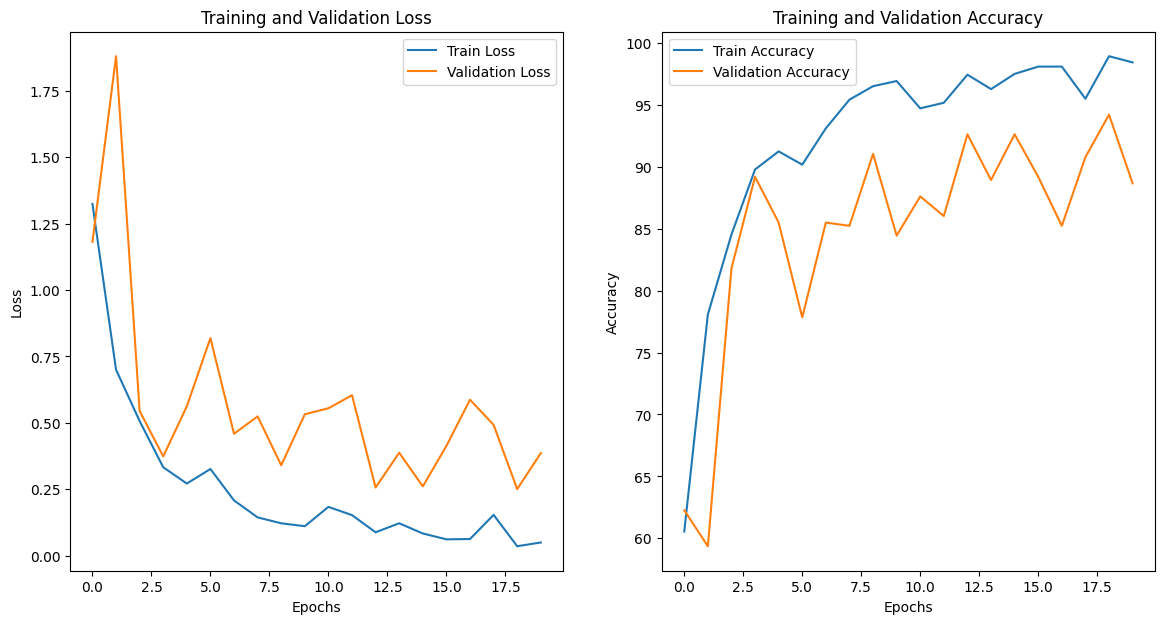

In [9]:
import matplotlib.pyplot as plt
epochs_range = range(epochs)

plt.figure(figsize=(14, 7))

# Plot Train and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, test_losses, label
         ='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Train and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, test_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()